In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

# Visualizations

In [19]:
import os
import pandas as pd

from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.custom_classes.experiments_visualizer import ExperimentsVisualizer

## Initialize Configs

In [20]:
EXPERIMENT_NAME = 'stress_testing_nulls'
DB_COLLECTION_NAME = f'{EXPERIMENT_NAME}_results'
DATASET_NAME = 'Folktables_GA_2018'
EXPERIMENT_SESSION_UUID = '2f6541f0-2a77-446a-a5be-92d7b4187052'
SENSITIVE_ATTRS = ['SEX', 'RAC1P', 'AGEP', 'SEX&RAC1P&AGEP']
PREPROCESSING_TECHNIQUES = ['cat: mode, num: median', 'cat: mode_trimmed_0.3, num: median']

In [21]:
# MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression', 'RandomForestClassifier',
#                'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier']
MODEL_NAMES = ['DecisionTreeClassifier', 'LogisticRegression']

In [22]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [23]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [24]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(448, 27)

In [25]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].head(20)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:10:14.641,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.750905,0.803967,0.759501,0.760253,0.722222,0.913208,0.722854,0.798693,0.7600
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:15:17.036,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.750905,0.803967,0.759501,0.760253,0.722222,0.913208,0.722854,0.798693,0.7600
2,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-23 19:10:14.650,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.751147,0.803967,0.760095,0.760253,0.722222,0.913208,0.722462,0.799510,0.7602
3,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,1,OK,2023-04-23 19:15:17.046,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.751147,0.803967,0.760095,0.760253,0.722222,0.913208,0.722462,0.799510,0.7602
4,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-23 19:10:14.661,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.749940,0.802800,0.758314,0.759349,0.720867,0.909434,0.721286,0.798285,0.7590
5,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,2,OK,2023-04-23 19:15:17.061,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.750181,0.802800,0.758907,0.759349,0.722222,0.909434,0.721678,0.798285,0.7592
6,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-23 19:10:14.673,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.748733,0.802800,0.755938,0.759047,0.719512,0.916981,0.720502,0.797060,0.7580
7,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,3,OK,2023-04-23 19:15:17.074,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.749216,0.802800,0.756532,0.759349,0.720867,0.916981,0.721286,0.797060,0.7584
8,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-23 19:10:14.687,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.747285,0.803967,0.752969,0.759047,0.718157,0.916981,0.720502,0.795018,0.7570
9,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,4,OK,2023-04-23 19:15:17.085,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.747526,0.802800,0.752969,0.759047,0.718157,0.916981,0.720894,0.794610,0.7570


In [26]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct()

In [27]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
1,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:15:17.036,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.750905,0.803967,0.759501,0.760253,0.722222,0.913208,0.722854,0.798693,0.760000
29,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:16:36.028,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.757905,0.780630,0.737530,0.774125,0.738482,0.879245,0.751862,0.772152,0.761800
57,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:15:17.036,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.161986,0.000000,0.144239,0.152096,0.000000,0.000000,0.152144,0.146644,0.149450
85,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:16:36.028,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.170830,0.000000,0.154064,0.157045,0.000000,0.000000,0.148660,0.163729,0.156041
113,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:15:17.036,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.777873,0.880682,0.800394,0.802484,0.755662,0.950538,0.767204,0.836593,0.801784
141,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:16:36.028,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.773742,0.864943,0.776316,0.805404,0.759651,0.929825,0.780437,0.810333,0.795536
169,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:15:17.036,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.148846,0.060606,0.112568,0.135439,0.143243,0.051502,0.126032,0.129655,0.127920
197,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:16:36.028,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.192181,0.087879,0.161749,0.170236,0.175676,0.090129,0.156039,0.177931,0.167445
225,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:15:17.036,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.354455,0.649746,0.392718,0.374309,0.413043,0.343750,0.442529,0.305305,0.380695
253,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:16:36.028,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.294554,0.659898,0.382315,0.297652,0.347826,0.343750,0.348933,0.300300,0.327018


In [28]:
exp_subgroup_metrics_dct['DecisionTreeClassifier']['cat: mode, num: median']['Exp_iter_1'][0.0].head(100)

,Metric,Bootstrap_Model_Seed,Model_Name,Model_Params,Run_Number,Dataset_Name,Num_Estimators,Test_Set_Index,Tag,Record_Create_Date_Time,...,Injector_Config_Lst,AGEP_dis,AGEP_priv,RAC1P_dis,RAC1P_priv,SEX&RAC1P&AGEP_dis,SEX&RAC1P&AGEP_priv,SEX_dis,SEX_priv,overall
0,Accuracy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:10:14.641,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.750905,0.803967,0.759501,0.760253,0.722222,0.913208,0.722854,0.798693,0.760000
28,Accuracy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:11:29.214,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.757905,0.780630,0.737530,0.774125,0.738482,0.879245,0.751862,0.772152,0.761800
56,Entropy,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:10:14.641,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.161986,0.000000,0.144239,0.152096,0.000000,0.000000,0.152144,0.146644,0.149450
84,Entropy,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:11:29.214,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.170830,0.000000,0.154064,0.157045,0.000000,0.000000,0.148660,0.163729,0.156041
112,F1,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:10:14.641,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.777873,0.880682,0.800394,0.802484,0.755662,0.950538,0.767204,0.836593,0.801784
140,F1,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:11:29.214,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.773742,0.864943,0.776316,0.805404,0.759651,0.929825,0.780437,0.810333,0.795536
168,FNR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:10:14.641,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.148846,0.060606,0.112568,0.135439,0.143243,0.051502,0.126032,0.129655,0.127920
196,FNR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:11:29.214,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.192181,0.087879,0.161749,0.170236,0.175676,0.090129,0.156039,0.177931,0.167445
224,FPR,101,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_1,Folktables_GA_2018,10,0,OK,2023-04-23 19:10:14.641,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.354455,0.649746,0.392718,0.374309,0.413043,0.343750,0.442529,0.305305,0.380695
252,FPR,102,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",Run_2,Folktables_GA_2018,10,0,OK,2023-04-23 19:11:29.214,...,"[0.05, 0.1, 0.2, 0.3, 0.4, 0.5]",0.294554,0.659898,0.382315,0.297652,0.347826,0.343750,0.348933,0.300300,0.327018


In [29]:
exp_avg_group_metrics_dct = exp_composer.compose_group_metrics(exp_subgroup_metrics_dct)

In [30]:
exp_avg_group_metrics_dct['DecisionTreeClassifier']['cat: mode_trimmed_0.3, num: median']['Exp_iter_1'][0.5].head(100)

,Metric,SEX,RAC1P,AGEP,SEX&RAC1P&AGEP,Model_Name
0,Equalized_Odds_TPR,-0.000369,0.016804,-0.093370,-0.099768,DecisionTreeClassifier
1,Equalized_Odds_FPR,0.074364,0.071170,-0.331503,0.016984,DecisionTreeClassifier
2,Disparate_Impact,1.130670,1.087759,1.032421,1.248786,DecisionTreeClassifier
3,Statistical_Parity_Difference,0.143962,0.099857,0.037039,0.251989,DecisionTreeClassifier
4,Accuracy_Parity,-0.050123,-0.027723,-0.046342,-0.190694,DecisionTreeClassifier
5,Label_Stability_Ratio,1.006000,0.998782,0.912650,0.903506,DecisionTreeClassifier
6,IQR_Parity,-0.046145,0.013958,-0.003705,-0.027341,DecisionTreeClassifier
7,Std_Parity,-0.023275,0.003294,0.013631,-0.002723,DecisionTreeClassifier
8,Std_Ratio,0.777445,1.035958,1.167434,0.966744,DecisionTreeClassifier
9,Jitter_Parity,0.002526,-0.003197,0.063083,0.075048,DecisionTreeClassifier


## Metrics Visualization and Reporting

In [31]:
visualizer = ExperimentsVisualizer(exp_subgroup_metrics_dct=exp_subgroup_metrics_dct,
                                   exp_avg_runs_group_metrics_dct=exp_avg_group_metrics_dct,
                                   dataset_name=DATASET_NAME,
                                   model_names=MODEL_NAMES,
                                   sensitive_attrs=SENSITIVE_ATTRS)

In [32]:
visualizer.melted_exp_avg_runs_subgroup_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.5]

,Metric,Model_Name,Num_Estimators,Test_Set_Index,Dataset_Split_Seed,Model_Init_Seed,Subgroup,Metric_Value
0,Accuracy,DecisionTreeClassifier,10.0,6.0,100.0,100.0,AGEP_dis,0.749216
1,Entropy,DecisionTreeClassifier,10.0,6.0,100.0,100.0,AGEP_dis,0.170802
2,F1,DecisionTreeClassifier,10.0,6.0,100.0,100.0,AGEP_dis,0.775558
3,FNR,DecisionTreeClassifier,10.0,6.0,100.0,100.0,AGEP_dis,0.154498
4,FPR,DecisionTreeClassifier,10.0,6.0,100.0,100.0,AGEP_dis,0.351980
...,...,...,...,...,...,...,...,...
139,Positive-Rate,DecisionTreeClassifier,10.0,6.0,100.0,100.0,overall,1.171577
140,Selection-Rate,DecisionTreeClassifier,10.0,6.0,100.0,100.0,overall,0.652100
141,Std,DecisionTreeClassifier,10.0,6.0,100.0,100.0,overall,0.093175
142,TNR,DecisionTreeClassifier,10.0,6.0,100.0,100.0,overall,0.618629


In [33]:
visualizer.melted_exp_avg_runs_group_metrics_dct[MODEL_NAMES[0]][PREPROCESSING_TECHNIQUES[0]]['Exp_iter_1'][0.3].head(1000)

,Metric,Model_Name,Group,Metric_Value
0,Equalized_Odds_TPR,DecisionTreeClassifier,SEX,0.007331
1,Equalized_Odds_FPR,DecisionTreeClassifier,SEX,0.085662
2,Disparate_Impact,DecisionTreeClassifier,SEX,1.146296
3,Statistical_Parity_Difference,DecisionTreeClassifier,SEX,0.156587
4,Accuracy_Parity,DecisionTreeClassifier,SEX,-0.048792
5,Label_Stability_Ratio,DecisionTreeClassifier,SEX,1.017890
6,IQR_Parity,DecisionTreeClassifier,SEX,-0.041964
7,Std_Parity,DecisionTreeClassifier,SEX,-0.021036
8,Std_Ratio,DecisionTreeClassifier,SEX,0.793905
9,Jitter_Parity,DecisionTreeClassifier,SEX,-0.005942


### Subgroup metrics per dataset, experiment iteration, and model

In [48]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='variance')

alt.VConcatChart(...)

In [49]:
visualizer.create_subgroups_grid_pct_lines_plot(model_name=MODEL_NAMES[1],
                                                target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                subgroup_metrics_type='error')

alt.VConcatChart(...)

### Group metrics per dataset and model

In [36]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='variance')

alt.VConcatChart(...)

In [37]:
visualizer.create_groups_grid_pct_lines_plot(model_name=MODEL_NAMES[0],
                                             target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                             group_metrics_type='fairness')

alt.VConcatChart(...)

### Specific subgroup metric per dataset and multiple models

In [38]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='Jitter',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[1],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

In [39]:
visualizer.create_subgroups_grid_pct_lines_per_model_plot(subgroup_metric='F1',
                                                          target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                          model_names=MODEL_NAMES)

alt.VConcatChart(...)

### Specific group metric per dataset, experiment iteration, and multiple models

In [40]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Label_Stability_Ratio',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

In [41]:
visualizer.create_groups_grid_pct_lines_per_model_plot(group_metric='Disparate_Impact',
                                                       target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                       model_names=MODEL_NAMES[:2])

alt.VConcatChart(...)

### Specific subgroup metric per dataset, one model, and multiple preprocessing techniques

In [42]:
visualizer.create_subgroups_grid_pct_lines_per_model_and_preprocessing_plot(subgroup_metric='Jitter', model_name=MODEL_NAMES[0])

alt.VConcatChart(...)

### Box plots for subgroup metrics per model and experiment iteration

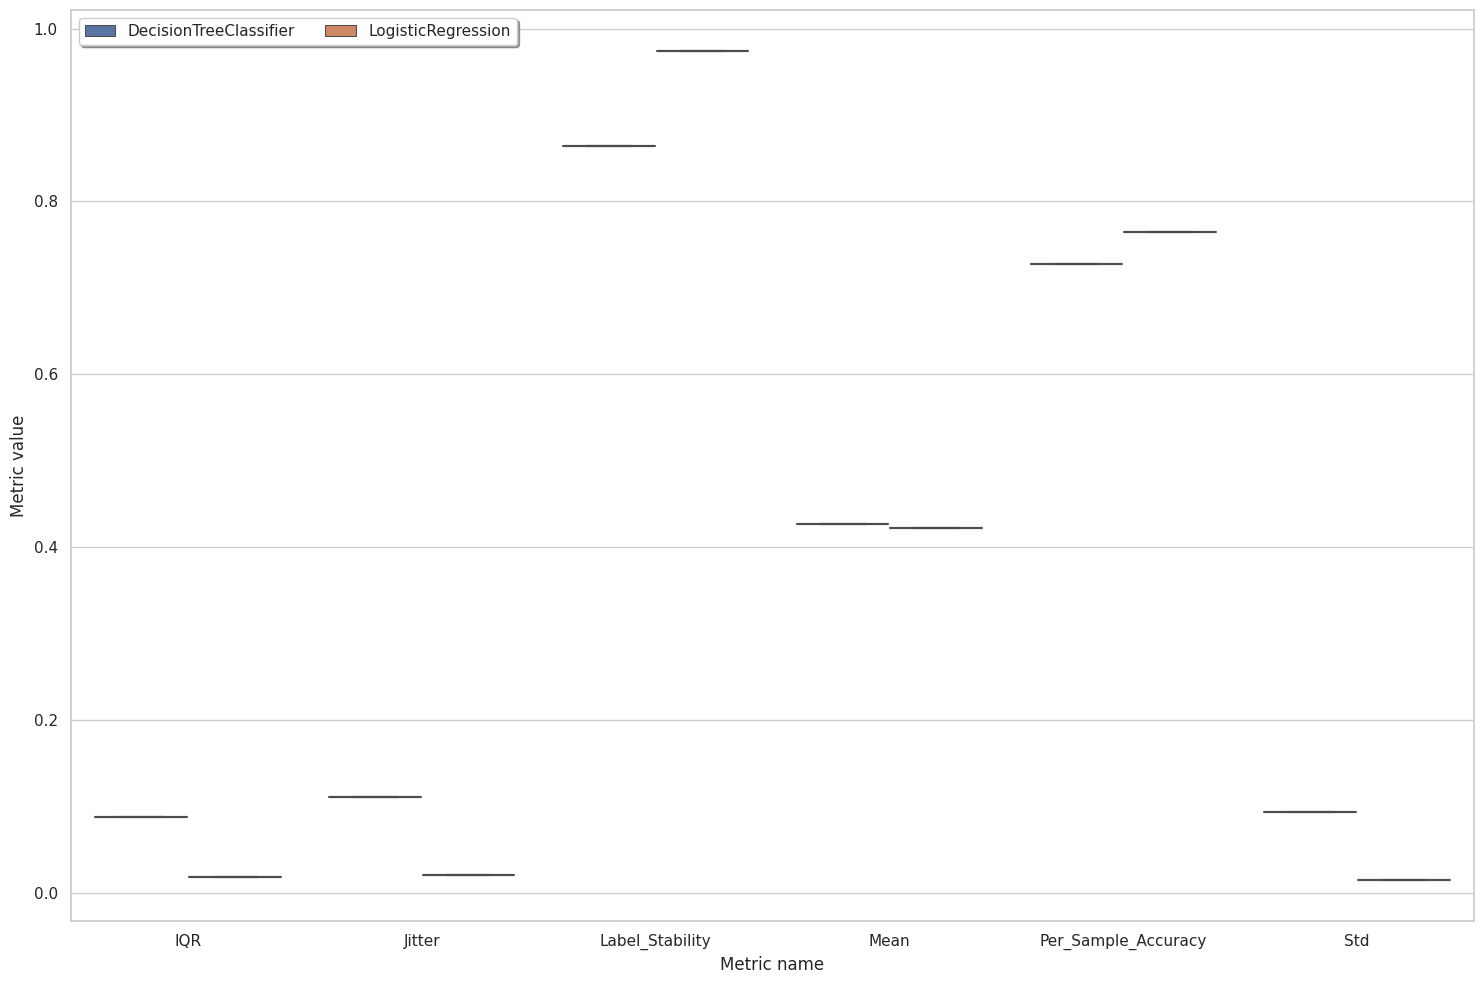

In [43]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='variance')

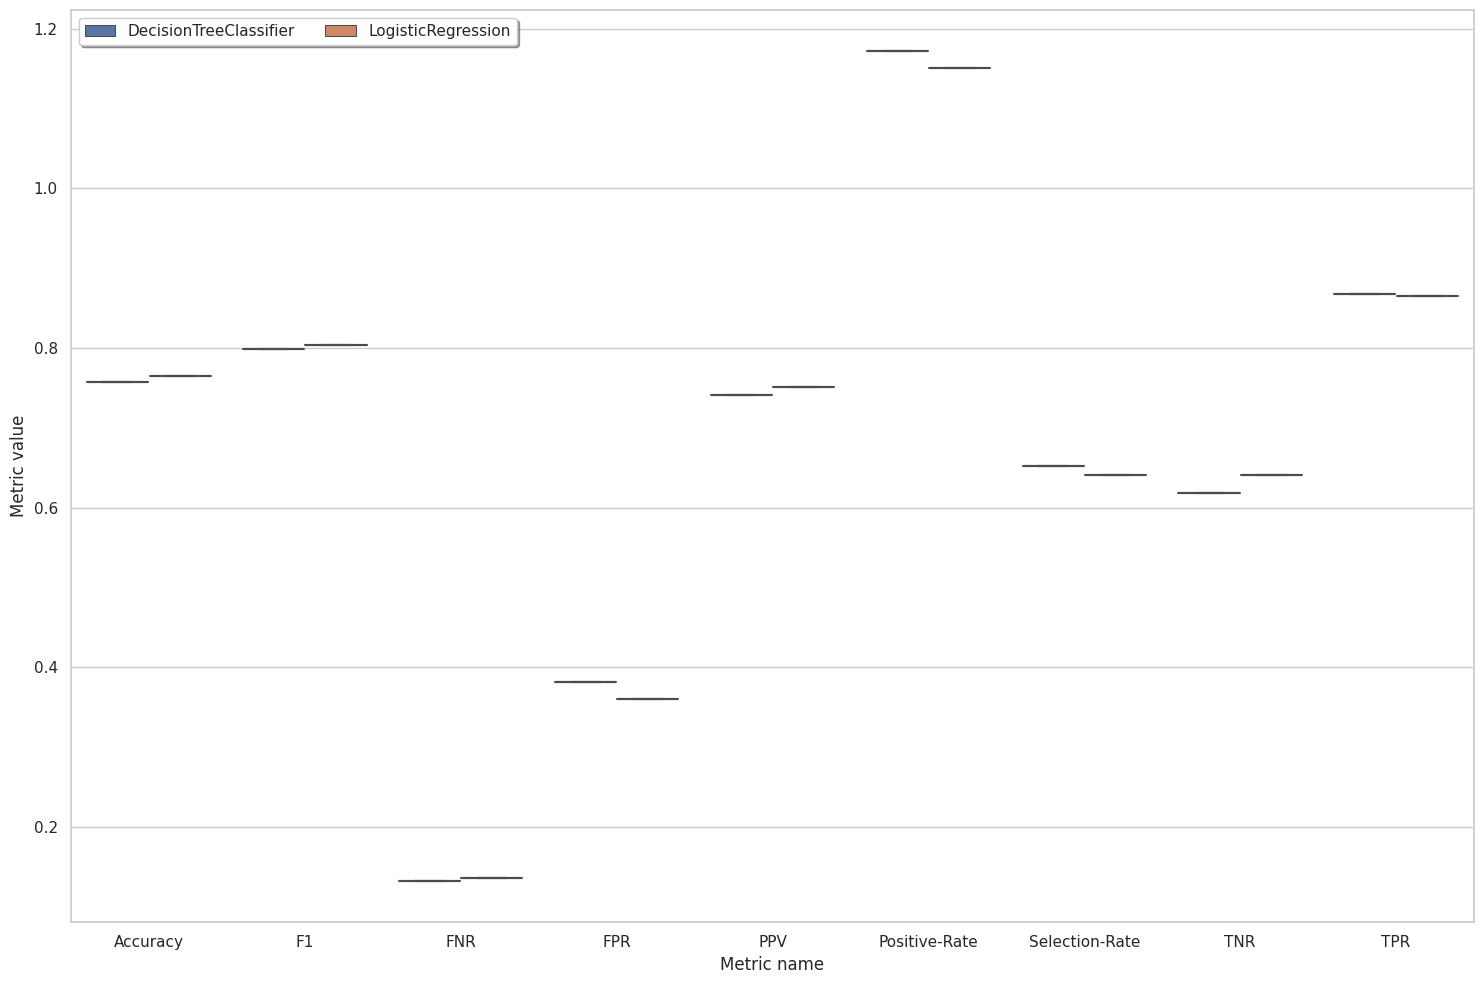

In [44]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_exp_iters(target_percentage=0.5,
                                                                   target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                   subgroup_metrics_type='error')

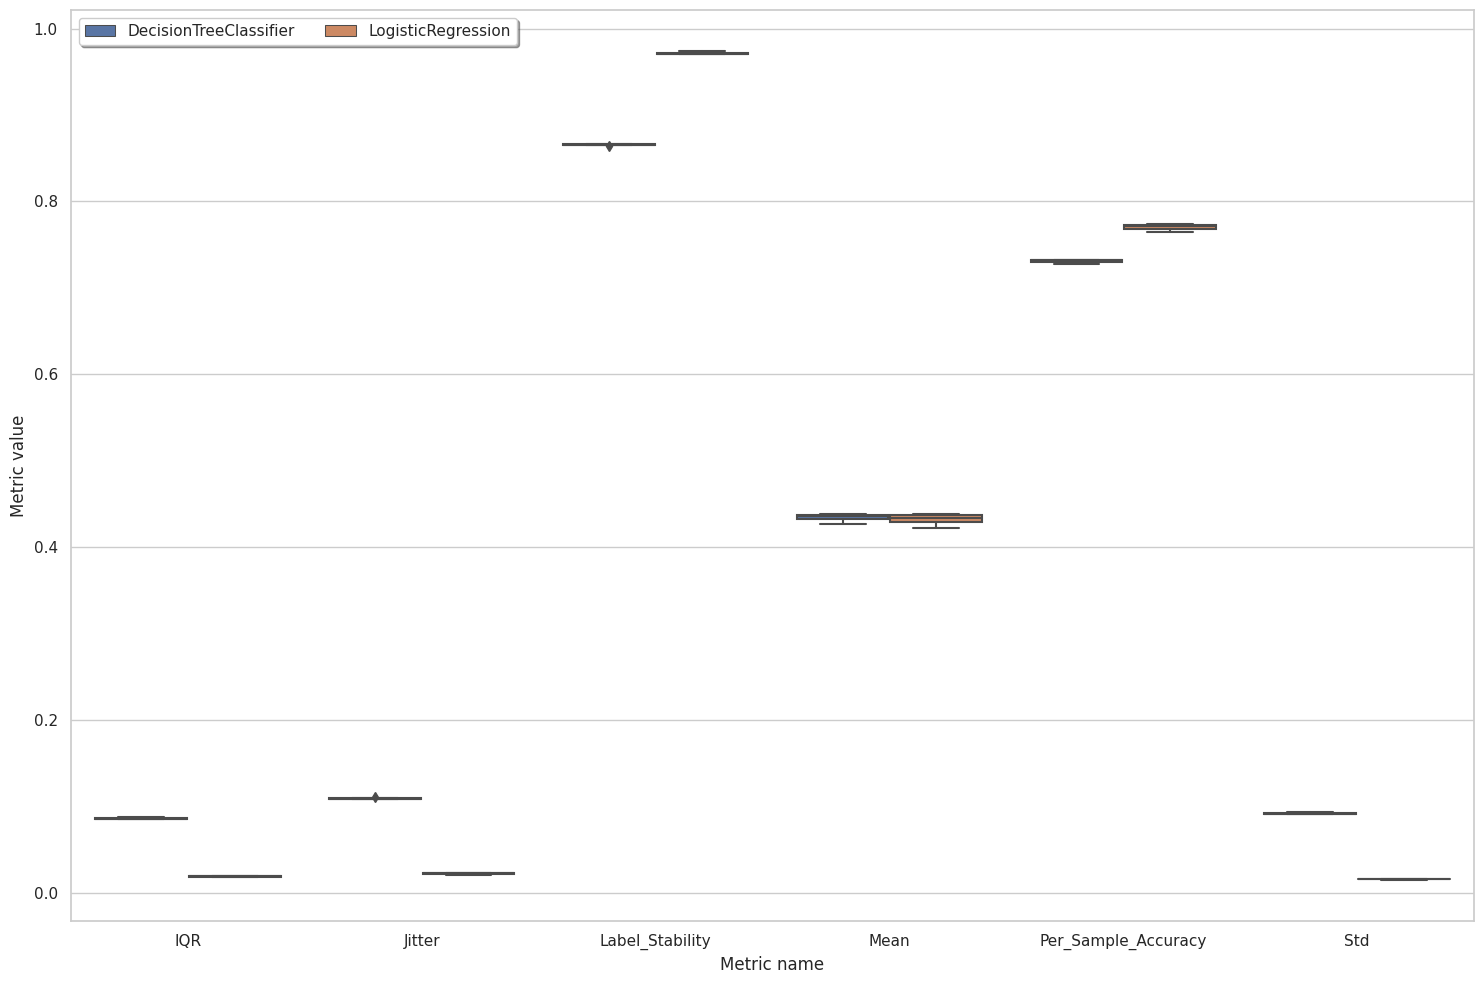

In [45]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[0],
                                                                     subgroup_metrics_type='variance')

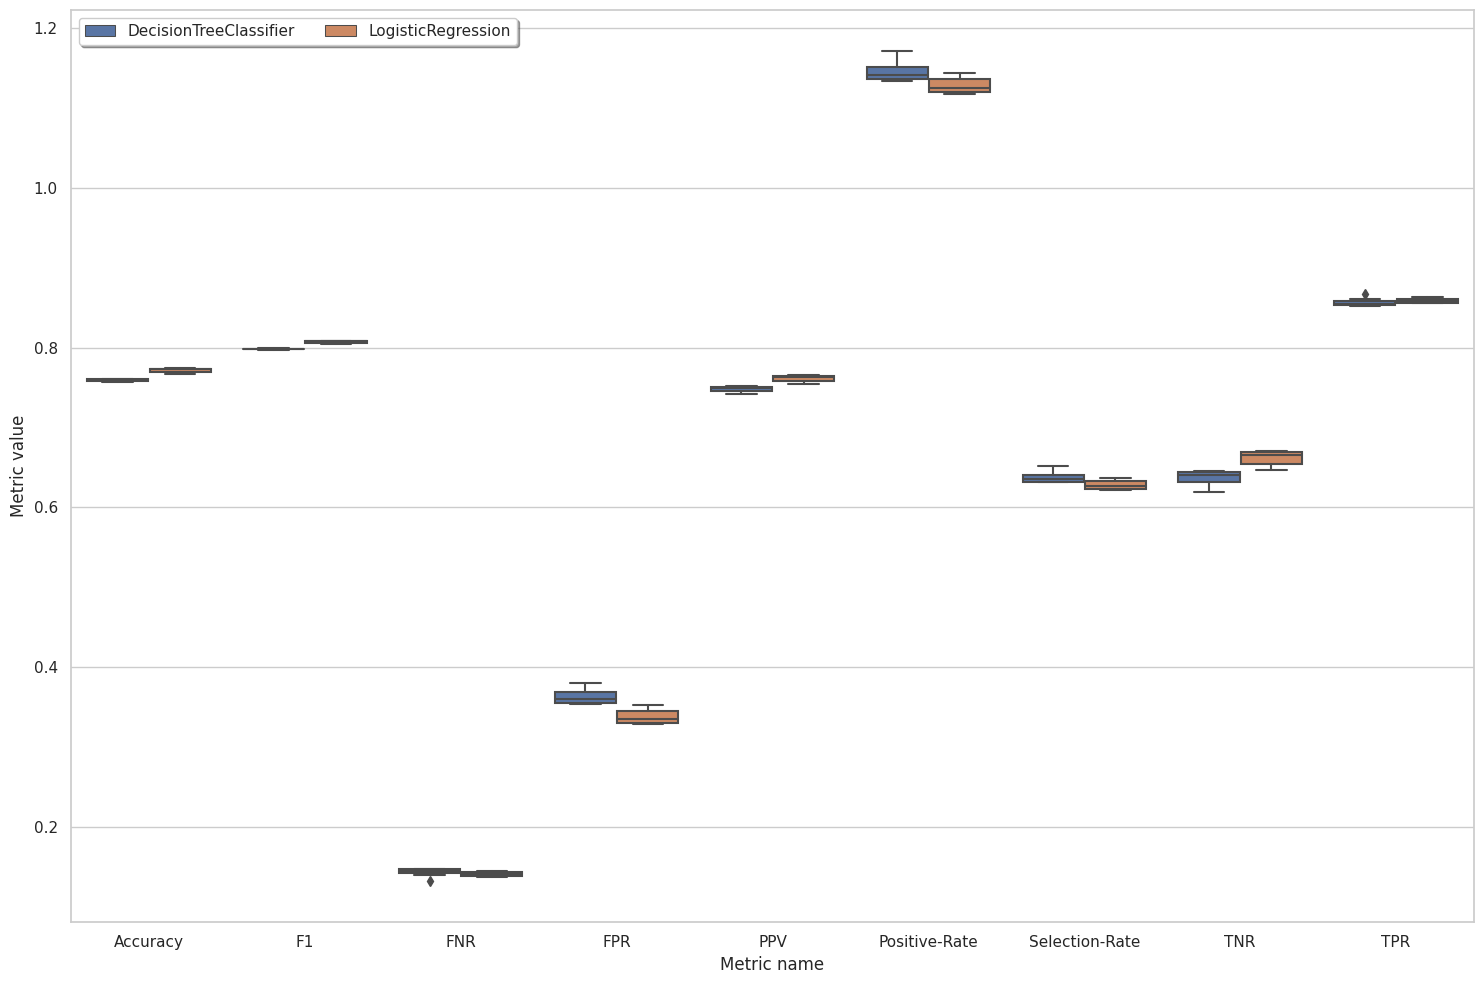

In [47]:
visualizer.create_subgroup_metrics_box_plot_for_multiple_percentages(target_preprocessing_technique=PREPROCESSING_TECHNIQUES[1],
                                                                     subgroup_metrics_type='error')